This version of the snake game allows you to implement and run your evolutionary algorithm

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 8.0MB/s 


In [2]:
import random
import time
import turtle

In [3]:
XSIZE = YSIZE = 16 # Number of grid cells in each direction (do not change this)

Change headless to True when evolving your solution. You can then pickle your final solution, and run it with this set to True to visualize the result, if you wish. Note that, when using Turtle,  to run it again properly you might need to go to restart your kernel after the visualization has finished.

If you are running on the cloud, or on Google Colab, you can chose to remove the turtle and display code altogether and only run headless. You could then pickle your best solution and use this code to see it play.

In [4]:
HEADLESS = True

In [5]:
class DisplayGame:
    def __init__(self, XSIZE, YSIZE):
        # SCREEN
        self.win = turtle.Screen()
        self.win.title("EVCO Snake game")
        self.win.bgcolor("grey")
        self.win.setup(width=(XSIZE*20)+40,height=(YSIZE*20)+40)
        #self.win.screensize((XSIZE*20)+20,(YSIZE*20)+20)
        self.win.tracer(0)

        #Snake Head
        self.head = turtle.Turtle()
        self.head.shape("square")
        self.head.color("black")

        # Snake food
        self.food = turtle.Turtle()
        self.food.shape("circle")
        self.food.color("yellow")
        self.food.penup()
        self.food.shapesize(0.55, 0.55)
        self.segments = []

    def reset(self, snake):
        self.segments = []
        self.head.penup()
        self.food.goto(-500, -500)
        self.head.goto(-500, -500)
        for i in range(len(snake)-1):
            self.add_snake_segment()
        self.update_segment_positions(snake)
       
    def update_food(self,new_food):
        self.food.goto(((new_food[1]-9)*20)+20, (((9-new_food[0])*20)-10)-20)
        
    def update_segment_positions(self, snake):
        self.head.goto(((snake[0][1]-9)*20)+20, (((9-snake[0][0])*20)-10)-20)
        for i in range(len(self.segments)):
            self.segments[i].goto(((snake[i+1][1]-9)*20)+20, (((9-snake[i+1][0])*20)-10)-20)

    def add_snake_segment(self):
        self.new_segment = turtle.Turtle()
        self.new_segment.speed(0)
        self.new_segment.shape("square")
        self.new_segment.color("green")
        self.new_segment.penup()
        self.segments.append(self.new_segment)

In [6]:
import math

class snake:
    def __init__(self, _XSIZE, _YSIZE):
        self.XSIZE = _XSIZE
        self.YSIZE = _YSIZE
        self.reset()

    def reset(self):
        self.snake = [[8,10], [8,9], [8,8], [8,7], [8,6], [8,5], [8,4], [8,3], [8,2], [8,1],[8,0] ]# Initial snake co-ordinates [ypos,xpos]    
        self.food = self.place_food()
        self.ahead = []
        self.snake_direction = "right"

    def place_food(self):
        self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        while (self.food in self.snake):
            self.food = [random.randint(1, (YSIZE-2)), random.randint(1, (XSIZE-2))]
        return( self.food )
    
    def update_snake_position(self):
        self.snake.insert(0, [self.snake[0][0] + (self.snake_direction == "down" and 1) + (self.snake_direction == "up" and -1), self.snake[0][1] + (self.snake_direction == "left" and -1) + (self.snake_direction == "right" and 1)])

    def food_eaten(self):
        if self.snake[0] == self.food:                                            # When snake eats the food
            return True
        else:    
            last = self.snake.pop()  # [1] If it does not eat the food, it moves forward and so last tail item is removed
            return False
            
    def snake_turns_into_self(self):
        if self.snake[0] in self.snake[1:]:
            return True
        else:
            return False

    def snake_hit_wall(self):
        if self.snake[0][0] == 0 or self.snake[0][0] == (YSIZE-1) or self.snake[0][1] == 0 or self.snake[0][1] == (XSIZE-1):
            return True
        else:
            return False





    # DIRECTIONAL SENSING FUNCTIONS
    def get_direction(self):
        if self.snake_direction == "up":
            return 0
        if self.snake_direction == "down":
            return 1
        if self.snake_direction == "right":
            return 2
        if self.snake_direction == "left":
            return 3

    def getAheadLocation(self):
        self.ahead = [self.snake[0][0] 
                    + (self.snake_direction == "down" and 1) 
                    + (self.snake_direction == "up" and -1), 
                self.snake[0][1] 
                    + (self.snake_direction == "left" and -1)
                    + (self.snake_direction == "right" and 1)]
        return self.ahead

    def getRightLocation(self):
        self.right = [self.snake[0][0] 
                    + (self.snake_direction == "right" and 1) 
                    + (self.snake_direction == "left" and -1), 
                self.snake[0][1] 
                    + (self.snake_direction == "up" and -1)
                    + (self.snake_direction == "down" and 1)]
        return self.right

    def getLeftLocation(self):
        self.left = [self.snake[0][0] 
                    + (self.snake_direction == "left" and 1) 
                    + (self.snake_direction == "right" and -1), 
                self.snake[0][1] 
                    + (self.snake_direction == "down" and -1)
                    + (self.snake_direction == "up" and 1)]
        return self.left
    
    def check_correct_direction(self):
        self.dy = self.food[0] - self.snake[0][0]
        self.dx = self.food [1] - self.snake[0][1]
        if self.dx <= 0 and not self.snake_direction == "right":
            if self.snake_direction == "up" or self.snake_direction == "left":
                if self.dy < 0:
                    return 1
            if self.snake_direction == "down" or self.snake_direction == "left":
                if self.dy > 0:
                    return 1
            if self.dy == 0 and self.snake_direction == "left":
                return 1
        if self.dx >= 0 and not self.snake_direction == "left":
            if self.snake_direction == "up" or self.snake_direction == "right":
                if self.dy < 0:
                    return 1
            if self.snake_direction == "down" or self.snake_direction == "right":
                if self.dy > 0:
                    return 1
            if self.dy == 0 and self.snake_direction == "right":
                return 1
        
        return 0
        
    
    # WALL SENSING FUNCTIONS
    def sense_wall_ahead(self):
        self.ahead = self.getAheadLocation()
        if self.ahead[0] == 0 or self.ahead[0] == (YSIZE-1) or self.ahead[1] == 0 or self.ahead[1] == (XSIZE-1):
            return 1
        else:
            return 0

    def sense_wall_right(self):
        right = self.getRightLocation()
        if right[0] == 0 or right[0] == (YSIZE-1) or right[1] == 0 or right[1] == (XSIZE-1):
            return 1
        else:
            return 0
    
    def sense_wall_left(self):
        self.left = self.getRightLocation()
        if self.left[0] == 0 or self.left[0] == (YSIZE-1) or self.left[1] == 0 or self.left[1] == (XSIZE-1):
            return 1
        else:
            return 0
    
    def sense_wall_two_ahead(self):
        self.two_ahead = [self.snake[0][0] 
                    + (self.snake_direction == "down" and 2) 
                    + (self.snake_direction == "up" and -2), 
                self.snake[0][1] 
                    + (self.snake_direction == "left" and -2)
                    + (self.snake_direction == "right" and 2)]
        if self.two_ahead[0] == 0 or self.two_ahead[0] == (YSIZE-1) or self.two_ahead[1] == 0 or self.two_ahead[1] == (XSIZE-1):
            return 1
        else:
            return 0

     



    # TAIL SENSE
    def sense_tail_up(self):
        up = [self.snake[0][0] - 1, self.snake[0][1]]
        return (up in self.snake)

    def sense_tail_ahead(self):
        self.ahead = self.getAheadLocation()
        return self.ahead in self.snake
    
    def sense_tail_right(self):
        self.right = self.getRightLocation() in self.snake
        return self.right
    
    def sense_tail_left(self):
        self.left = self.getLeftLocation() in self.snake
        return self.left



    # FOOD SENSE
    # If dx is negative => food on snake's left else right
    # If dy is negative => food above snake else below
    def get_food_distance(self):
        self.dy = self.food[0] - self.snake[0][0]
        self.dx = self.food [1] - self.snake[0][1]
        dist = math.sqrt(self.dx**2 + self.dy**2)
        return dist

    def get_food_distance_xy(self):
        self.dy = self.food[0] - self.snake[0][0]
        self.dx = self.food [1] - self.snake[0][1]
        return self.dx, self.dy

    def get_tail_distance(self, tail):
        self.dx = tail[0] - self.snake[0][0]
        self.dy = tail[0] - self.snake[0][1]
        self.dist = math.sqrt(self.dx**2 + self.dy**2)
        return self.dist


    
    def sense_radius(self):
        y = self.snake[0][0]
        x = self.snake[0][1]
        self.grids = []
        for distance in range(1,17):
            self.cell1 = [y-distance, x-distance]
            self.cell2 = [y-distance, x]
            self.cell3 = [y-distance, x+distance]
            self.cell4 = [y, x-distance]
            self.cell5 = [y, x+distance]
            self.cell6 = [y+distance, x-distance]
            self.cell7 = [y+distance, x]
            self.cell8 = [y+distance, x+distance]

            if y-distance < 0:
                self.cell1 = []
                self.cell2 = []
                self.cell3 = []
            if y+distance > 16:
                self.cell6 = []
                self.cell7 = []
                self.cell8 = []
            if x-distance < 0:
                self.cell1 = []
                self.cell4 = []
                self.cell6 = []
            if x+distance > 16:
                self.cell3 = []
                self.cell5 = []
                self.cell8 = []

            self.row1 = [self.cell1, self.cell2, self.cell3]
            self.row2 = [self.cell4, [y,x], self.cell5]
            self.row3 = [self.cell6, self.cell7, self.cell8]
            self.grid = [self.row1,
                    self.row2,
                    self.row3]

            self.grids.append(self.grid)
        
        return self.grids


    def sense_food_top_left(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[0][0]:
                return 1
        else:
            return 0

    def sense_food_top_mid(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[0][1]:
                return 1
        else:
            return 0
            
    def sense_food_top_right(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[0][2]:
                return 1
        else:
            return 0

    def sense_food_mid_left(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[1][0]:
                return 1
        else:
            return 0

    def sense_food_mid_right(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[1][2]:
                return 1
        else:
            return 0

    def sense_food_bot_left(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[2][0]:
                return 1
        else:
            return 0

    def sense_food_bot_mid(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[2][1]:
                return 1
        else:
            return 0

    def sense_food_bot_right(self):
        grids = self.sense_radius()
        for grid in grids:
            if self.food == grid[2][2]:
                return 1
        else:
            return 0

In [7]:
snake_game = snake(XSIZE,YSIZE)

In [8]:
if not HEADLESS:
    display = DisplayGame(XSIZE,YSIZE)

# CODE

<br>

In [9]:
import math

def run_game(display,snake_game, headless, network):

    # COUNTERS
    moves_counter = 0
    food_score = 0
    steps_score = 0
    penalty_score = 0

    snake_game.reset()
    if not headless:
        display.reset(snake_game.snake)
        display.win.update()
    snake_game.place_food()
    game_over = False
    snake_direction = "right"

    flag = True
    just_started = True
    while not game_over:

        # ****YOUR AI BELOW HERE******************

        moves_counter += 1

        # DIRECTION
        direction = snake_game.get_direction()
        correct_direction = snake_game.check_correct_direction()

        current_x = snake_game.snake[0][1]
        current_y = snake_game.snake[0][0]
        previous_x = 0
        previous_y = 0

        if not just_started:
            previous_x = snake_game.snake[0][1]
            previous_y = snake_game.snake[0][0]
        
        food_x = snake_game.food[0]
        food_y = snake_game.food[1]
        food_dist = snake_game.get_food_distance()
        dx, dy = snake_game.get_food_distance_xy()

        # TAIL
        tail_ahead = snake_game.sense_tail_ahead()
        tail_right = snake_game.sense_tail_right()
        tail_left = snake_game.sense_tail_left()

        # FOOD 
        food_top_left = snake_game.sense_food_top_left()
        food_top_mid = snake_game.sense_food_top_mid()
        food_top_right = snake_game.sense_food_top_right()
        food_mid_left = snake_game.sense_food_mid_left()
        food_mid_right = snake_game.sense_food_mid_right()
        food_bot_left = snake_game.sense_food_bot_left()
        food_bot_mid = snake_game.sense_food_bot_mid()
        food_bot_right = snake_game.sense_food_bot_right()

        # WALLS 
        wall_ahead = snake_game.sense_wall_ahead()
        wall_right = snake_game.sense_wall_right()
        wall_left = snake_game.sense_wall_left()
        wall_two_ahead = snake_game.sense_wall_two_ahead()
    
        
        # DECISION
        decision = network.feedForward([
            direction,
            correct_direction,
            current_x,
            current_y,
            previous_x,
            previous_y,
            food_x,
            food_y,
            dx,
            dy,
            tail_ahead,
            tail_right,
            tail_left,
            food_top_left,
            food_top_mid,
            food_top_right,
            food_mid_left,
            food_mid_right,
            food_bot_left,
            food_bot_mid,
            food_bot_right,
            wall_ahead,
            wall_left,
            wall_right,
            wall_two_ahead,
            ])

        decision = np.argmax(decision, axis=0)

        if decision == 0: 
            new_snake_direction = "up"
        if decision == 1:
            new_snake_direction = "right"
        if decision == 2:
            new_snake_direction = "down"
        if decision == 3:
            new_snake_direction = "left"

        snake_game.snake_direction = new_snake_direction

        snake_game.check_correct_direction()
        if snake_game.check_correct_direction() == 1.0:
            steps_score += 1
        if not snake_game.check_correct_direction():
            penalty_score += 1
        
        just_started = False
        
        # ****YOUR AI ABOVE HERE******************
            
        snake_game.update_snake_position()

        # Check if food is eaten
        if snake_game.food_eaten():
            moves_counter = 0
            snake_game.place_food()
            food_score += 1

        # Game over if the snake runs over itself
        if snake_game.snake_turns_into_self():
            penalty_score += 1
            game_over = True
            print("Snake turned into itself!")

        # Game over if the snake goes through a wall
        if snake_game.snake_hit_wall():
            penalty_score += 1
            game_over = True
            print("Snake hit a wall!")

        # STEPS TIMER
        if moves_counter >= 200 and food_score < 5:
            print("MICKLINO TIMED OUT")
            game_over = True
        if moves_counter >= 250 and food_score >= 5:
            print("MICKLINO TIMED OUT")
            game_over = True

        if not headless:       
            display.update_food(snake_game.food)
            display.update_segment_positions(snake_game.snake)
            display.win.update()
            time.sleep(0.2) # Change this to modify the speed the game runs at when displayed.

    print("\nFINAL score - " + str(food_score))
    print()
    if not headless: turtle.done()
    
    return int(food_score), int(steps_score), int(penalty_score)

In [10]:
import numpy as np
import math

In [11]:
class MLP(object):
    def __init__(self, numInput, numHidden1, numHidden2, numOutput):
        self.fitness = 0
        self.numInput = numInput
        self.numHidden1 = numHidden1
        self.numHidden2 = numHidden2
        self.numOutput = numOutput

        self.w_i_h1 = np.random.randn(self.numHidden1, self.numInput) 
        self.w_h1_h2 = np.random.randn(self.numHidden2, self.numHidden1) 
        self.w_h2_o = np.random.randn(self.numOutput, self.numHidden2)

        self.b_i_h1 = [0] * numHidden1
        self.b_i_h2 = [0] * numHidden2
        self.b_i_output = [0] * numOutput

        self.ReLU = lambda x : max(0,x)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum()
    
    def feedForward(self, inputs):
        h1 = np.dot(self.w_i_h1, inputs)
        h1 = [h + b for h, b in zip(h1, self.b_i_h1)]
        h1 = [self.ReLU(x) for x in h1]
        
        h2 = np.dot(self.w_h1_h2, h1)
        h2 = [h + b for h, b in zip(h2, self.b_i_h2)]
        h2 = [self.ReLU(x) for x in h2]
        
        output = np.dot(self.w_h2_o, h2)
        output = [o + b for o, b in zip(output, self.b_i_output)]
        output = self.softmax(output)
        return output

    def getWeightsLinear(self):
        flat_w_i_h1 = list(self.w_i_h1.flatten())
        flat_w_h1_h2 = list(self.w_h1_h2.flatten())
        flat_w_h2_o = list(self.w_h2_o.flatten())
        return( flat_w_i_h1 + flat_w_h1_h2 + flat_w_h2_o )

    def setWeightsLinear(self, Wgenome):
        numWeights_I_H1 = self.numHidden1 * self.numInput
        numWeights_H1_H2 = self.numHidden2 * self.numHidden1
        numWeights_H2_O = self.numOutput * self.numHidden2

        first_slice_end = numWeights_I_H1
        second_slice_end = first_slice_end + numWeights_H1_H2
        third_slice_end = second_slice_end + numWeights_H2_O
        fourth_slice_end = third_slice_end + self.numHidden1
        fith_slice_end = fourth_slice_end + self.numHidden2

        self.w_i_h1 = np.array(Wgenome[:first_slice_end])
        self.w_i_h1 = self.w_i_h1.reshape((self.numHidden1, self.numInput))
        
        self.w_h1_h2 = np.array(Wgenome[first_slice_end:(second_slice_end)])
        self.w_h1_h2 = self.w_h1_h2.reshape((self.numHidden2, self.numHidden1))

        self.w_h2_o = np.array(Wgenome[second_slice_end:third_slice_end])
        self.w_h2_o = self.w_h2_o.reshape((self.numOutput, self.numHidden2))

        self.b_i_h1 = np.array(Wgenome[third_slice_end:fourth_slice_end])
        self.b_i_h2 = np.array(Wgenome[fourth_slice_end:fith_slice_end])
        self.b_i_output = np.array(Wgenome[fith_slice_end:])

In [12]:
# Number of nodes in each layer
num_input_nodes = 25
num_hidden_nodes_1 = 18
num_hidden_nodes_2 = 18
num_output_nodes = 4



NUM_WEIGHTS = (num_input_nodes * num_hidden_nodes_1) + (num_hidden_nodes_1 * num_hidden_nodes_2) + (num_hidden_nodes_2 * num_output_nodes)

NUM_BIASES = num_hidden_nodes_1 + num_hidden_nodes_2 + num_output_nodes

IND_SIZE = NUM_WEIGHTS + NUM_BIASES



myNet = MLP(num_input_nodes, num_hidden_nodes_1, num_hidden_nodes_2, num_output_nodes)

In [13]:
from deap import base 
from deap import creator
from deap import tools

import random
import time

In [14]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1.0, 1.0)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)

In [15]:
def evaluate(indiv, myNet, game, generation):
    myNet.setWeightsLinear(indiv)
    game.reset()
    print("GEN: ,", generation)
    food, steps, penalty = run_game(display, snake_game, HEADLESS, myNet)
    print("food: ", food, ",   steps: ", steps)
    fitness = 30*float(np.log(steps+1))+ (steps/2) + (food*500) - (((0.1*penalty)**1.3)*(food**1.2))
    print("fitness: " + str(fitness))
    print("END")
    print()
    print("___________________")
    print()
    return int(fitness),

In [16]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selRoulette)
toolbox.register("crossover", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.01)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)



stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()

pop = toolbox.population(n=150)
game = snake_game

In [17]:
fitness = [toolbox.evaluate(indiv, myNet, game, 1) for indiv in pop]
for ind, fit in zip(pop, fitness):
    ind.fitness.values = fit

GEN: , 1
Snake turned into itself!

FINAL score - 0

food:  0 ,   steps:  1
fitness: 21.29441541679836
END

___________________

GEN: , 1
Snake turned into itself!

FINAL score - 0

food:  0 ,   steps:  1
fitness: 21.29441541679836
END

___________________

GEN: , 1
Snake turned into itself!

FINAL score - 0

food:  0 ,   steps:  3
fitness: 43.08883083359672
END

___________________

GEN: , 1
Snake hit a wall!

FINAL score - 0

food:  0 ,   steps:  0
fitness: 0.0
END

___________________

GEN: , 1
Snake turned into itself!

FINAL score - 0

food:  0 ,   steps:  0
fitness: 0.0
END

___________________

GEN: , 1
Snake hit a wall!

FINAL score - 0

food:  0 ,   steps:  6
fitness: 61.3773044716594
END

___________________

GEN: , 1
Snake hit a wall!

FINAL score - 0

food:  0 ,   steps:  5
fitness: 56.25278407684165
END

___________________

GEN: , 1
Snake hit a wall!

FINAL score - 0

food:  0 ,   steps:  6
fitness: 61.3773044716594
END

___________________

GEN: , 1
Snake turned into its

In [18]:
NGEN = 2000
CXPB = 0.2

for g in range(NGEN):
    print("--GEN: {}-----------------------------------------------".format(g))

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.crossover(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = [toolbox.evaluate(indiv, myNet, game, g) for indiv in invalid_ind]
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit
    
    pop[:] = offspring
    record = stats.compile(pop)
    logbook.record(gen=g, **record)

Streaming output truncated to the last 5000 lines.

___________________

GEN: , 1996
Snake turned into itself!

FINAL score - 1

food:  1 ,   steps:  15
fitness: 590.162911346927
END

___________________

GEN: , 1996
Snake turned into itself!

FINAL score - 5

food:  5 ,   steps:  57
fitness: 2633.32682567005
END

___________________

GEN: , 1996
Snake hit a wall!

FINAL score - 1

food:  1 ,   steps:  22
fitness: 605.0147077545117
END

___________________

GEN: , 1996
Snake turned into itself!

FINAL score - 0

food:  0 ,   steps:  9
fitness: 73.57755278982138
END

___________________

--GEN: 1997-----------------------------------------------
GEN: , 1997
Snake turned into itself!

FINAL score - 4

food:  4 ,   steps:  43
fitness: 2131.07667229614
END

___________________

GEN: , 1997
Snake turned into itself!

FINAL score - 11

food:  11 ,   steps:  143
fitness: 5690.492779679796
END

___________________

GEN: , 1997
Snake turned into itself!

FINAL score - 1

food:  1 ,   steps:  15

In [19]:
logbook.header = "gen", "avg", "evals", "std", "min", "max"

import matplotlib.pyplot as plt
%matplotlib inline
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
min = logbook.select("min")
max = logbook.select("max")

Text(0, 0.5, 'Mean Fitness')

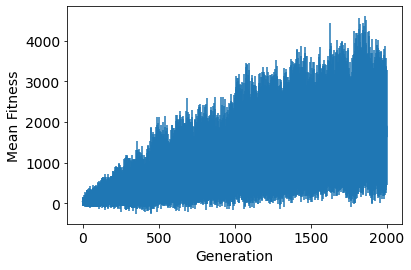

In [20]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14) 
plt.rc('legend', fontsize=14)

fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

Text(0, 0.5, 'Worst Individuals')

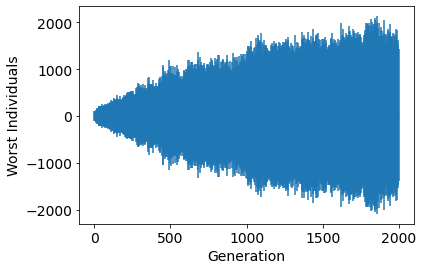

In [21]:
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, min, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Worst Individuals")

Text(0, 0.5, 'Best Individuals')

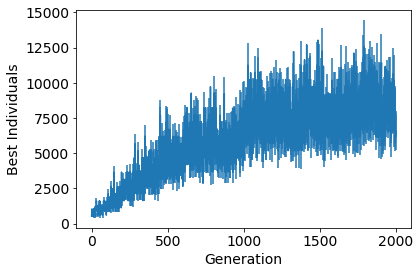

In [22]:
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, max, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Best Individuals")

In [23]:
def averageOfList(num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg

print(averageOfList(avgs))
print(np.max(avgs))
print(np.min(avgs))

1223.2150000000015
2580.3133333333335
37.85333333333333


In [24]:
print(np.max(max))
print(np.min(max))

print()
print(np.max(min))
print(np.min(min))

13026.0
555.0

56.0
0.0


Below is what you would use for your evaluation. You would also use it to display your final (pickled and loaded) solution, with headless = False.

If you have run without headless (i.e. with the display) you will need to reset your kernel to run again. This appears to be an IPython issue with Turtle, but if you have a way to deal with that, do please let me know. You will probable only want to run it one-at-a-time anyway.

In [ ]:
bestInd = tools.selBest(pop, 1)[0]

myNet.setWeightsLinear(bestInd)
display = DisplayGame(XSIZE,YSIZE)
fitness = run_game(display, game, False, myNet)